In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d haseebindata/student-performance-predictions
!unzip student-performance-predictions.zip


Dataset URL: https://www.kaggle.com/datasets/haseebindata/student-performance-predictions
License(s): apache-2.0
Archive:  student-performance-predictions.zip
  inflating: best_student_performance_model.pkl  
  inflating: st.ipynb                
  inflating: student_performance.csv  


In [3]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('student_performance.csv')
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

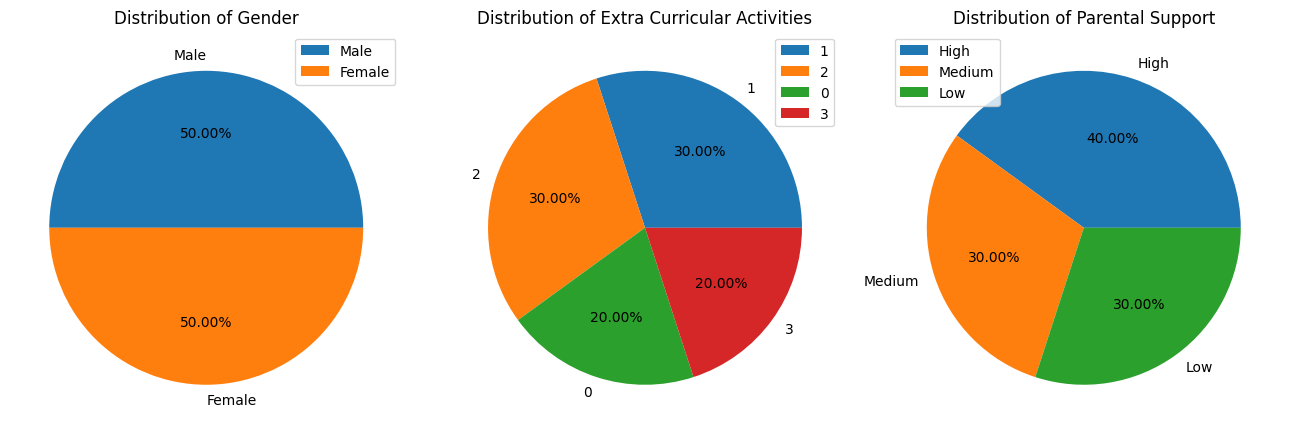

In [9]:
tdf=df['Gender'].value_counts().reset_index()
tdf.columns=['Gender','count']
tdf1=df['ExtracurricularActivities'].value_counts().reset_index()
tdf1.columns=['ExtracurricularActivities','count']
tdf2=df['ParentalSupport'].value_counts().reset_index()
tdf2.columns=['ParentalSupport','count']
fig,axs=plt.subplots(1,3,figsize=(13,13))
axs[0].set_title("Distribution of Gender")
axs[0].pie(x=tdf['count'],labels=tdf['Gender'],autopct='%.2f%%')
axs[0].legend(tdf['Gender'])
axs[1].set_title("Distribution of Extra Curricular Activities")
axs[1].pie(x=tdf1['count'],labels=tdf1['ExtracurricularActivities'],autopct='%.2f%%')
axs[1].legend(tdf1['ExtracurricularActivities'])
axs[2].set_title("Distribution of Parental Support")
axs[2].pie(x=tdf2['count'],labels=tdf2['ParentalSupport'],autopct='%.2f%%')
axs[2].legend(tdf2['ParentalSupport'])
plt.tight_layout()
plt.show()

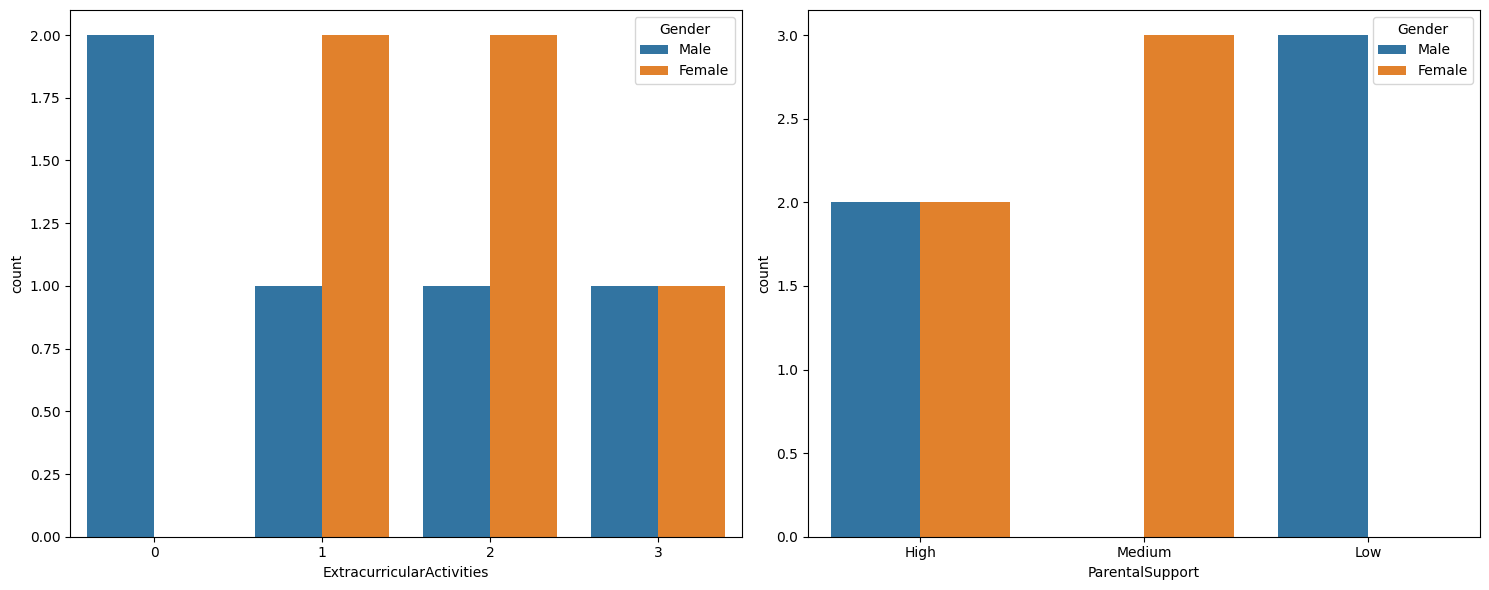

In [10]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['ExtracurricularActivities'],hue=df['Gender'],ax=axs[0])
sns.countplot(x=df['ParentalSupport'],hue=df['Gender'],ax=axs[1])
plt.tight_layout()
plt.show()

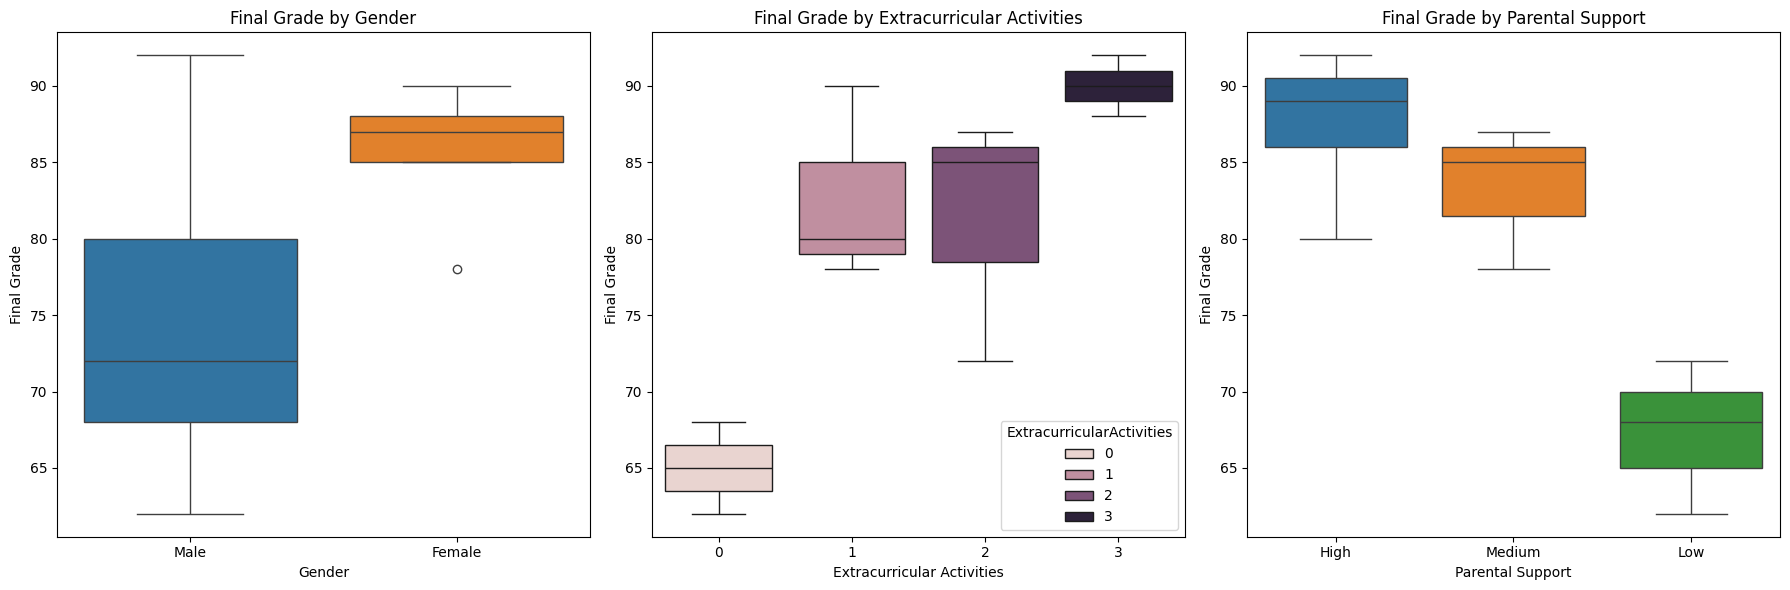

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Gender', y='FinalGrade', data=df, ax=axs[0],hue='Gender')
axs[0].set_title('Final Grade by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Final Grade')

sns.boxplot(x='ExtracurricularActivities', y='FinalGrade', data=df, ax=axs[1],hue='ExtracurricularActivities')
axs[1].set_title('Final Grade by Extracurricular Activities')
axs[1].set_xlabel('Extracurricular Activities')
axs[1].set_ylabel('Final Grade')

sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df, ax=axs[2],hue='ParentalSupport')
axs[2].set_title('Final Grade by Parental Support')
axs[2].set_xlabel('Parental Support')
axs[2].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()

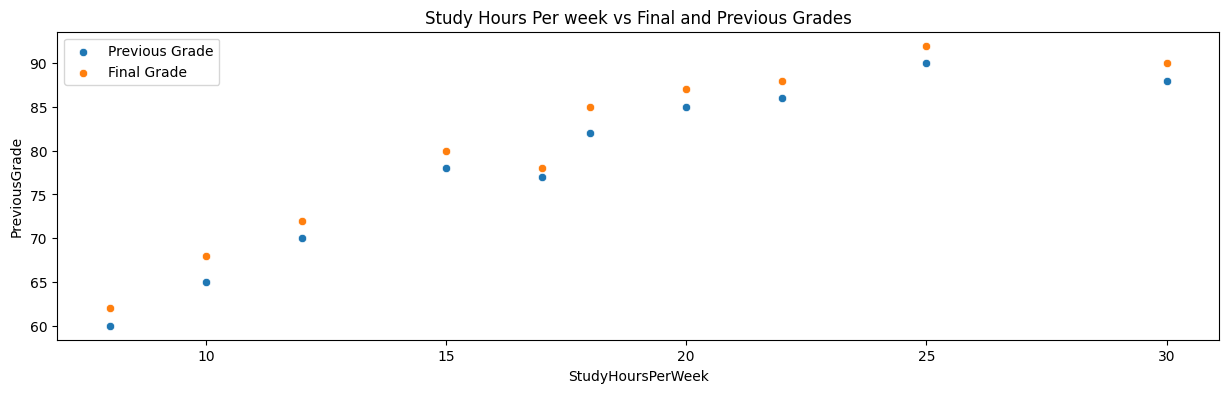

In [12]:
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='PreviousGrade', label='Previous Grade')
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='FinalGrade', label='Final Grade')
plt.title("Study Hours Per week vs Final and Previous Grades")
plt.legend()
plt.show()

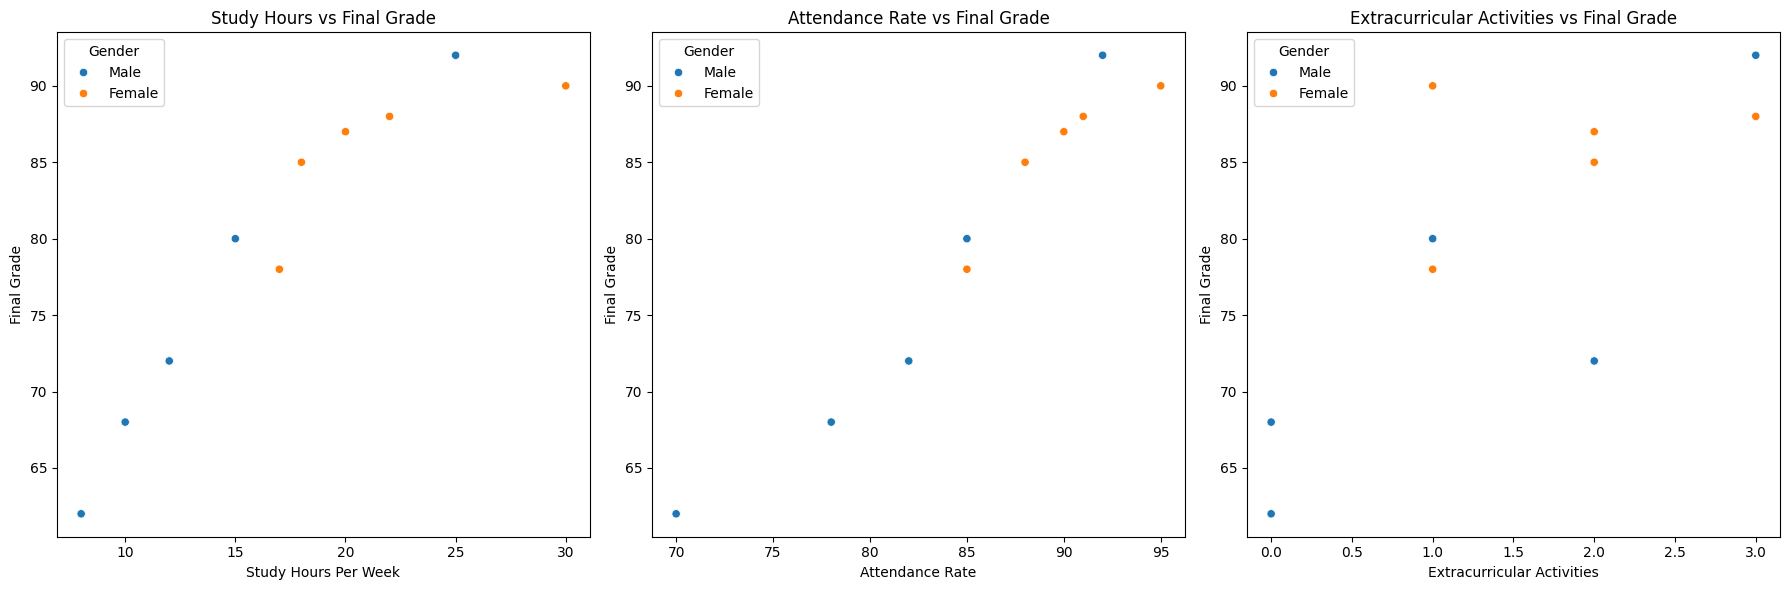

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=df['StudyHoursPerWeek'], y=df['FinalGrade'], ax=axs[0],hue=df['Gender'])
axs[0].set_title('Study Hours vs Final Grade')
axs[0].set_xlabel('Study Hours Per Week')
axs[0].set_ylabel('Final Grade')


sns.scatterplot(x=df['AttendanceRate'], y=df['FinalGrade'], ax=axs[1],hue=df['Gender'])
axs[1].set_title('Attendance Rate vs Final Grade')
axs[1].set_xlabel('Attendance Rate')
axs[1].set_ylabel('Final Grade')


sns.scatterplot(x=df['ExtracurricularActivities'], y=df['FinalGrade'], ax=axs[2],hue=df['Gender'])
axs[2].set_title('Extracurricular Activities vs Final Grade')
axs[2].set_xlabel('Extracurricular Activities')
axs[2].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()

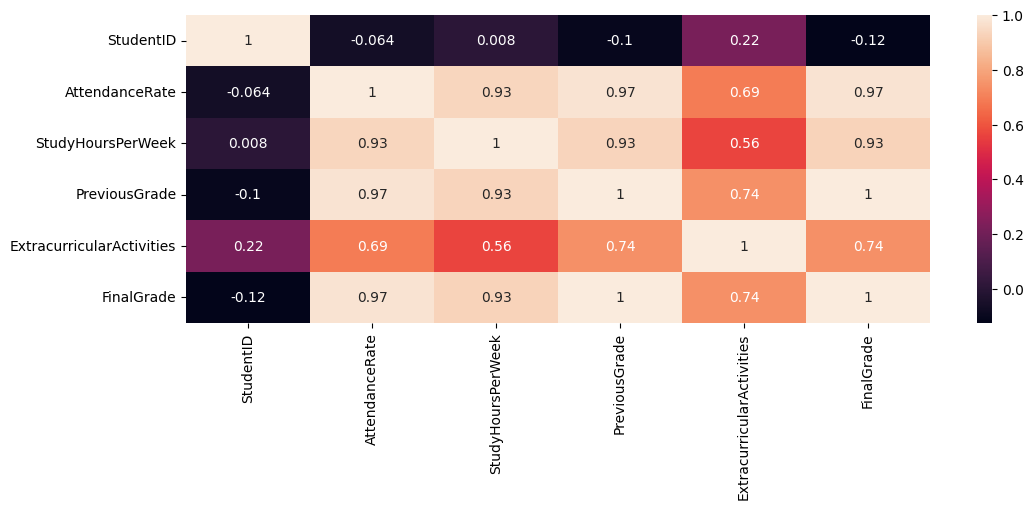

In [14]:
plt.figure(figsize=(12,4))
tdf=df.select_dtypes(include=['int64'])
sns.heatmap(tdf.corr(),annot=True)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


In [16]:
df.drop(columns=['StudentID','Name'],inplace=True,axis=1)
print(df['Gender'].value_counts())

Gender
Male      5
Female    5
Name: count, dtype: int64


In [17]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
print(df['ParentalSupport'].value_counts())

ParentalSupport
High      4
Medium    3
Low       3
Name: count, dtype: int64


In [18]:
df['ParentalSupport']=df['ParentalSupport'].apply(lambda x: 2 if x=='High' else 1 if x=='Medium' else 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     10 non-null     int64
 1   AttendanceRate             10 non-null     int64
 2   StudyHoursPerWeek          10 non-null     int64
 3   PreviousGrade              10 non-null     int64
 4   ExtracurricularActivities  10 non-null     int64
 5   ParentalSupport            10 non-null     int64
 6   FinalGrade                 10 non-null     int64
dtypes: int64(7)
memory usage: 692.0 bytes
None


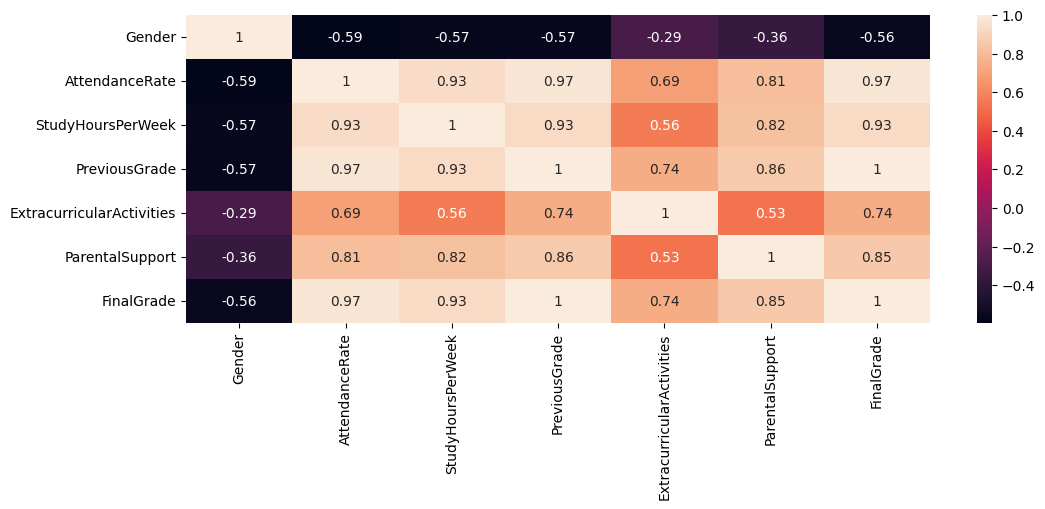

In [19]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [21]:
x=df.drop(columns='FinalGrade')
y=df['FinalGrade']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
ss=StandardScaler()
x_t=ss.fit_transform(x_t)
x_te=ss.transform(x_te)

In [22]:
reg=LinearRegression()
reg.fit(x_t,y_t)
pred1=reg.predict(x_te)
pred2=reg.predict(x_t)

In [23]:
print("Training Metrics")
print('R2 Score: ',r2_score(y_t,pred2))
print('Mean Squared Error: ',mean_squared_error(y_t,pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_t,pred2))

Training Metrics
R2 Score:  1.0
Mean Squared Error:  8.654931074424815e-29
Mean Absolute Error:  6.090366306515144e-15


In [24]:
print("Testing Metrics")
print('R2 Score: ',r2_score(y_te,pred1))
print('Mean Squared Error: ',mean_squared_error(y_te,pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_te,pred1))

Testing Metrics
R2 Score:  0.9522714724399345
Mean Squared Error:  1.8136840472824893
Mean Absolute Error:  1.3287671232876666


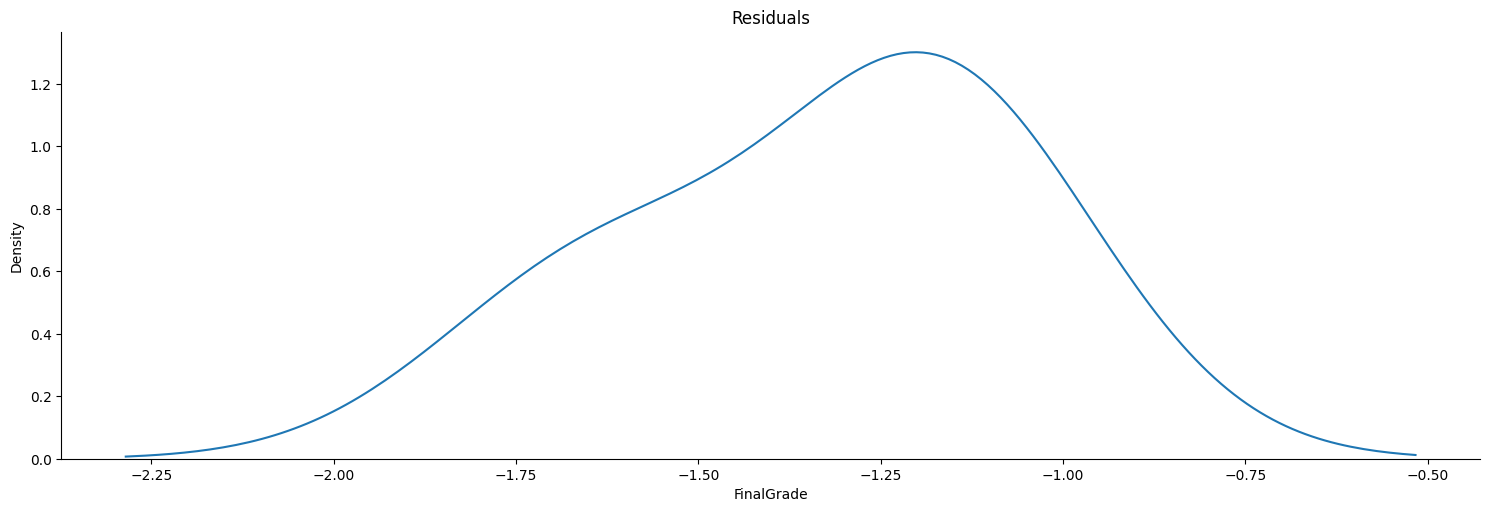

In [25]:
residuals=y_te-pred1
sns.displot(residuals, kind='kde', height=5, aspect=3)
plt.title("Residuals")
plt.show()